## About Dataset

source: https://www.kaggle.com/datasets/hellbuoy/car-price-prediction

Only data of 'Price' to be used. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm 
import statsmodels.formula.api as smf 
from sklearn import preprocessing
from scipy.stats import yeojohnson

In [2]:
file = 'CarPrice_Assignment.csv'

In [3]:
df = pd.read_csv(file)

In [4]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
df = df['price']

In [6]:
df.describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

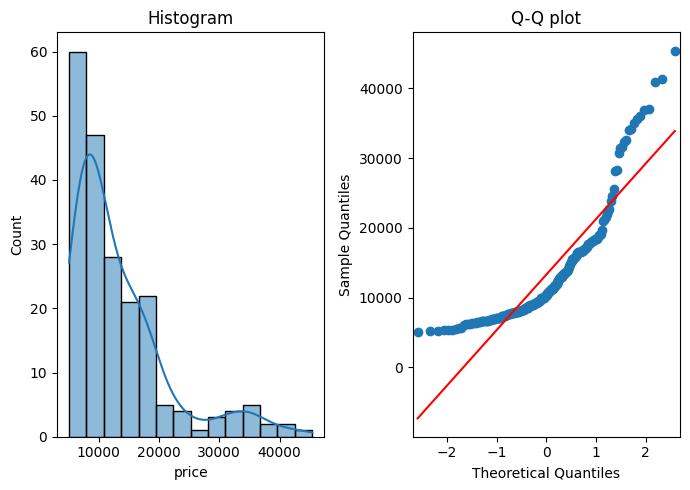

In [7]:
fig, ax = plt.subplots(1,2, figsize= (7,5))
sns.histplot(df, kde=True, ax=ax[0])
ax[0].set_title('Histogram')
sm.qqplot(df, line='s', ax=ax[1])
ax[1].set_title('Q-Q plot')
plt.tight_layout()
plt.show()

In [8]:
k2, p = stats.normaltest(df)
print('\nChi-squared statistic = %.3f, p = %.3f' % (k2, p))

alpha = 0.05
if p > alpha:
    print('\nThe data is Gaussian')
else:
    print('\nThe data does not look Gaussian')


Chi-squared statistic = 77.375, p = 0.000

The data does not look Gaussian


# 1. Apply logarithm function

In [9]:
function_1 = (lambda x: np.log(x))
df_log = df.apply(function_1)

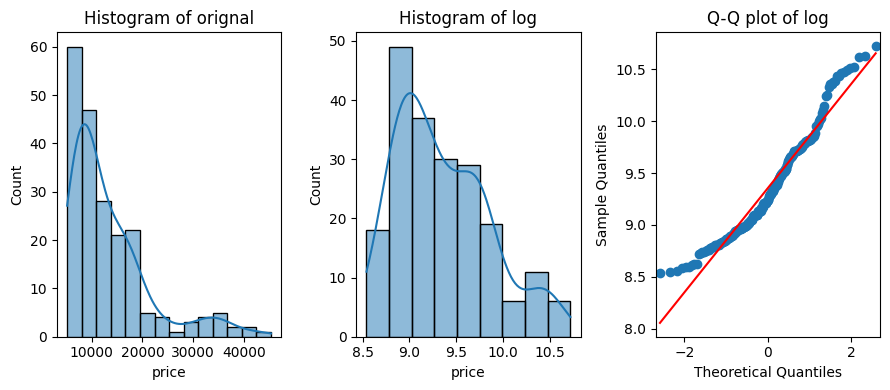

In [10]:
fig, ax = plt.subplots(1,3, figsize= (9,4))
sns.histplot(df, kde=True, ax=ax[0])
ax[0].set_title('Histogram of orignal')
sns.histplot(df_log, kde=True, ax=ax[1])
ax[1].set_title('Histogram of log')
sm.qqplot(df_log, line='s', ax=ax[2])
ax[2].set_title('Q-Q plot of log')
plt.tight_layout()
plt.show()

In [11]:
np.std(df_log), np.mean(df_log), np.median(df_log)

(0.5025749151365049, 9.35467909844429, 9.23941361946189)

In [12]:
k2, p = stats.normaltest(df_log)
print('\nChi-squared statistic = %.3f, p = %.3f' % (k2, p))

alpha = 0.05
if p > alpha:
    print('\nThe transformed data is Gaussian')
else:
    print('\nThe transformed data does not look Gaussian')


Chi-squared statistic = 14.103, p = 0.001

The transformed data does not look Gaussian


# 2. Lognormal distribution

In [13]:
shape, loc, scale = stats.lognorm.fit(df, loc=0)
pdf_lognorm = stats.lognorm.pdf(df, shape, loc, scale)

In [14]:
np.std(pdf_lognorm), np.mean(pdf_lognorm), np.median(pdf_lognorm)

(3.7308315334018814e-05, 6.379859413719245e-05, 6.681959739475209e-05)

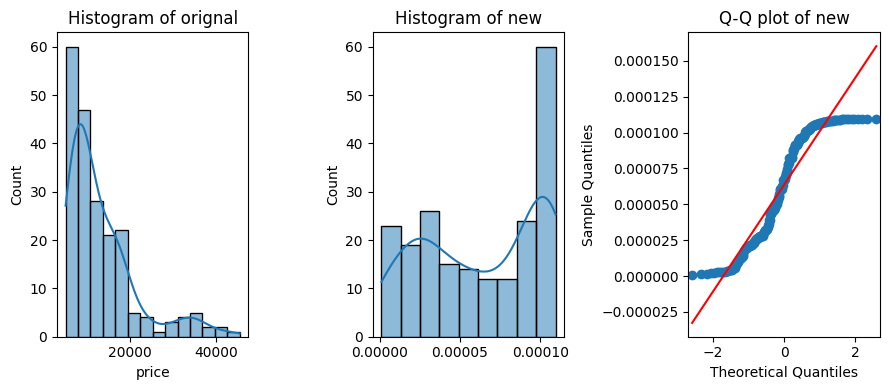

In [15]:
fig, ax = plt.subplots(1,3, figsize= (9,4))
sns.histplot(df, kde=True, ax=ax[0])
ax[0].set_title('Histogram of orignal')
sns.histplot(pdf_lognorm, kde=True, ax=ax[1])
ax[1].set_title('Histogram of new')
sm.qqplot(pdf_lognorm, line='s', ax=ax[2])
ax[2].set_title('Q-Q plot of new')
plt.tight_layout()
plt.show()

In [16]:
k2, p = stats.normaltest(pdf_lognorm)
print('\nChi-squared statistic = %.3f, p = %.3f' % (k2, p))

alpha = 0.05
if p > alpha:
    print('\nThe transformed data is Gaussian')
else:
    print('\nThe transformed data does not look Gaussian')


Chi-squared statistic = 3523.670, p = 0.000

The transformed data does not look Gaussian


# 3. Box-Cox Transformation

In [17]:
df_bc, lmbd = stats.boxcox(df)

Best lambda parameter = -0.628


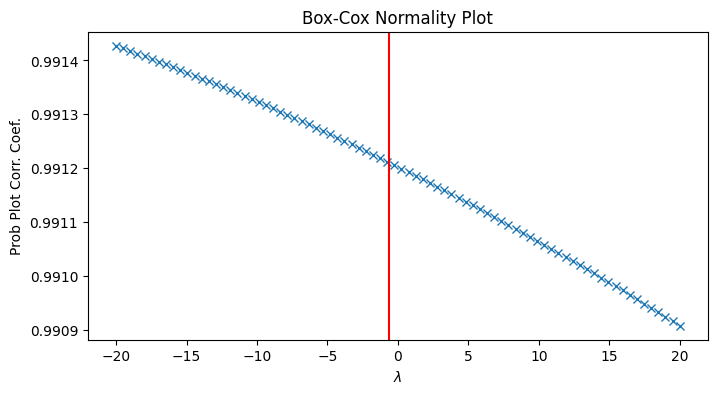

In [18]:
print('Best lambda parameter = %s' % round(lmbd, 3))

fig, ax = plt.subplots(figsize=(8, 4))
prob = stats.boxcox_normplot(df_bc, -20, 20, plot=ax)
ax.axvline(lmbd, color='r');

In [19]:
df_bc.sort()
mean, std = stats.norm.fit(df, loc = 0)
pdf_norm = stats.norm.pdf(df, mean, std)

In [20]:
np.std(df_bc), np.mean(df_bc), np.median(df_bc)

(0.001340444551733759, 1.5874699154741343, 1.587346036363706)

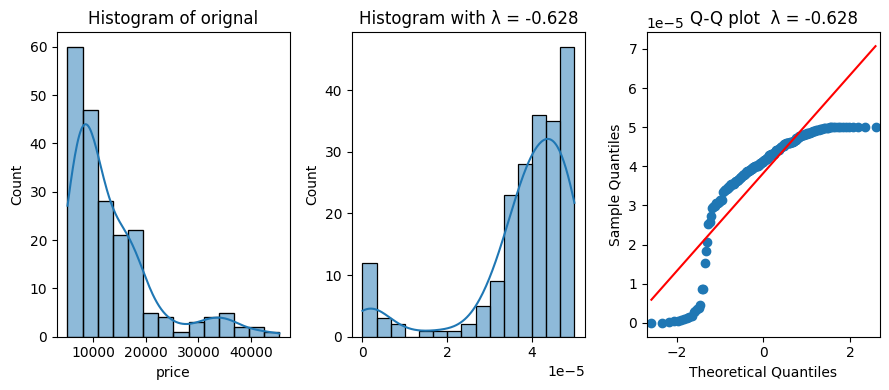

In [21]:
fig, ax = plt.subplots(1,3, figsize= (9,4))
sns.histplot(df, kde=True, ax=ax[0])
ax[0].set_title('Histogram of orignal')
sns.histplot(pdf_norm, kde=True, ax=ax[1])
ax[1].set_title(f'Histogram with λ = {lmbd:.03f}')
sm.qqplot(pdf_norm, line='s', ax=ax[2])
ax[2].set_title(f'    Q-Q plot  λ = {lmbd:.03f}')
plt.tight_layout()
plt.show()

In [22]:
k2, p = stats.normaltest(df_bc)
print('\nChi-squared statistic = %.3f, p = %.3f' % (k2, p))

alpha = 0.05
if p > alpha:
    print('\nThe transformed data is Gaussian')
else:
    print('\nThe transformed data does not look Gaussian')


Chi-squared statistic = 16.727, p = 0.000

The transformed data does not look Gaussian


# 4. Reversed Transformation

In [23]:
function_2 = (lambda x: 1/x)

In [24]:
df_reversed = df.apply(function_2)

In [25]:
df_reversed.describe()

count    205.000000
mean       0.000097
std        0.000042
min        0.000022
25%        0.000061
50%        0.000097
75%        0.000128
max        0.000195
Name: price, dtype: float64

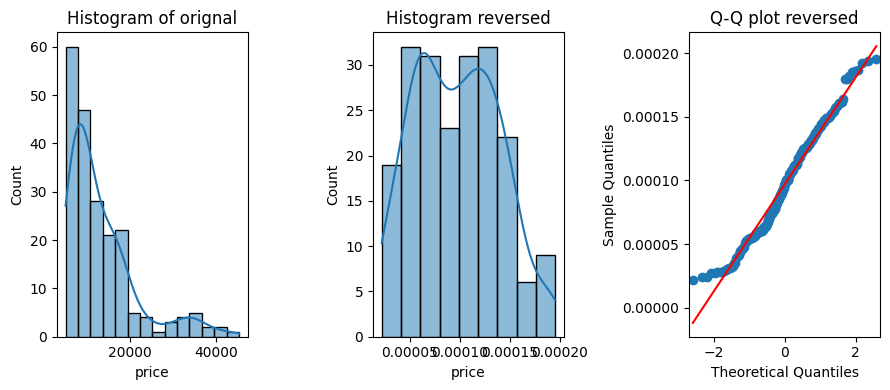

In [26]:
fig, ax = plt.subplots(1,3, figsize= (9,4))
sns.histplot(df, kde=True, ax=ax[0])
ax[0].set_title('Histogram of orignal')
sns.histplot(df_reversed, kde=True, ax=ax[1])
ax[1].set_title(f'Histogram reversed')
sm.qqplot(df_reversed, line='s', ax=ax[2])
ax[2].set_title(f'Q-Q plot reversed')
plt.tight_layout()
plt.show()

In [27]:
k2, p = stats.normaltest(df_reversed)
print('\nChi-squared statistic = %.3f, p = %.3f' % (k2, p))

alpha = 0.05
if p > alpha:
    print('\nThe transformed data is Gaussian')
else:
    print('\nThe transformed data does not look Gaussian')


Chi-squared statistic = 14.747, p = 0.001

The transformed data does not look Gaussian


# 5. Square Root Transformation

In [28]:
function_3 = (lambda x: np.sqrt(x))

In [29]:
df_sqrt = df.apply(function_3)

In [30]:
df_sqrt.describe()

count    205.000000
mean     111.120840
std       30.551968
min       71.540198
25%       88.249646
50%      101.464279
75%      128.464003
max      213.072758
Name: price, dtype: float64

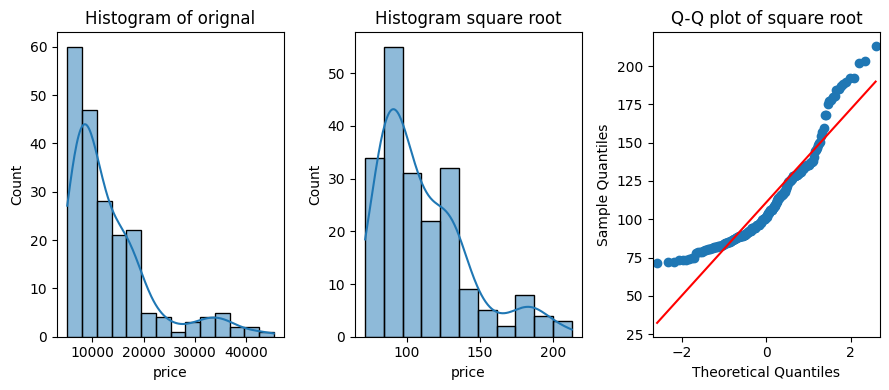

In [31]:
fig, ax = plt.subplots(1,3, figsize= (9,4))
sns.histplot(df, kde=True, ax=ax[0])
ax[0].set_title('Histogram of orignal')
sns.histplot(df_sqrt, kde=True, ax=ax[1])
ax[1].set_title(f'Histogram square root')
sm.qqplot(df_sqrt, line='s', ax=ax[2])
ax[2].set_title(f'Q-Q plot of square root')
plt.tight_layout()
plt.show()

In [32]:
k2, p = stats.normaltest(df_reversed)
print('\nChi-squared statistic = %.3f, p = %.3f' % (k2, p))

alpha = 0.05
if p > alpha:
    print('\nThe transformed data is Gaussian')
else:
    print('\nThe transformed data does not look Gaussian')


Chi-squared statistic = 14.747, p = 0.001

The transformed data does not look Gaussian


# 6. Yeo-Johnson Transformation

In [33]:
df_yj, lam = yeojohnson(df)

In [34]:
np.std(df_yj), np.mean(df_yj), np.median(df_yj)

(0.0013386912896005566, 1.5871632714713952, 1.587039546667022)

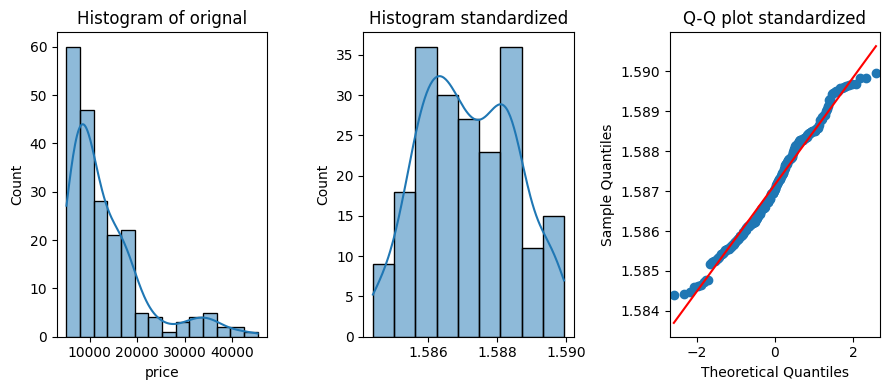

In [35]:
fig, ax = plt.subplots(1,3, figsize= (9,4))
sns.histplot(df, kde=True, ax=ax[0])
ax[0].set_title('Histogram of orignal')
sns.histplot(df_yj, kde=True, ax=ax[1])
ax[1].set_title(f'Histogram standardized')
sm.qqplot(df_yj, line='s', ax=ax[2])
ax[2].set_title(f'Q-Q plot standardized')
plt.tight_layout()
plt.show()

In [36]:
k2, p = stats.normaltest(df_yj)
print('\nChi-squared statistic = %.3f, p = %.3f' % (k2, p))

alpha = 0.05
if p > alpha:
    print('\nThe transformed data is Gaussian')
else:
    print('\nThe transformed data does not look Gaussian')


Chi-squared statistic = 16.730, p = 0.000

The transformed data does not look Gaussian
